CNN notebook © Arkaprabha Majumdar

In [12]:
#Let's load our model:
from google.colab import drive
drive.mount('/gdrive')
%cd ..

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/


In [8]:
from keras.datasets import mnist #popular image dataset

(x_train,y_train),(x_test,y_test) = mnist.load_data() #import the data

11493376/11490434 [==============================] - 0s 0us/step


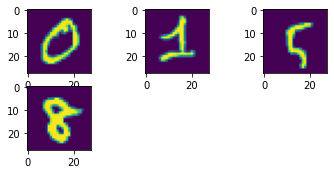

In [9]:
#Now we can plot the data from x_train as overview
#For visualization, we can use either OpenCV, which will open in a new window
# Or we can use matplotlib

import matplotlib.pyplot as plt

plt.subplot(331)
plt.imshow(x_train[1])

plt.subplot(332)
plt.imshow(x_train[24])

plt.subplot(333)
plt.imshow(x_train[100])

plt.subplot(334)
plt.imshow(x_train[2400])

plt.show()

In [10]:
#Now we know how the images look, so we need to feed into keras
x_train.shape

(60000, 28, 28)

We need to add another dimension to this because it is the format of keras input

In [11]:
x_train = x_train.reshape(x_train.shape + (1,))
x_train.shape

(60000, 28, 28, 1)

If image is grayscale, then value is 1. If image is color, then value is 3

In [12]:
x_test = x_test.reshape(x_test.shape + (1,))

input_shape = (28,28,1)

#then we change all values to float so we can normalize
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#and Normalize
x_train /= 255
x_test /= 255

In [13]:
#One Hot encoding on data layers
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)

y_test = np_utils.to_categorical(y_test)

In [1]:
from keras.models import load_model

model = load_model('/content/drive/My Drive/Colab Notebooks/CNNs/models/digit_recognition_10_epoch_64_batches_cnn.h5')

print(model.summary())

Using TensorFlow backend.


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [5]:
from keras import models

layer_outputs = [layer.output for layer in model.layers[:7]]

activation_model = models.Model(inputs = model.input , output = layer_outputs)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=[<tf.Tenso...)`
  """


In [25]:
activations = activation_model.predict(x_test[8].reshape(1,28,28,1))

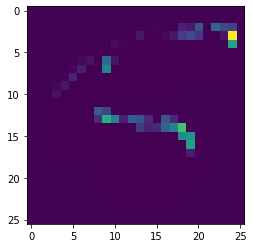

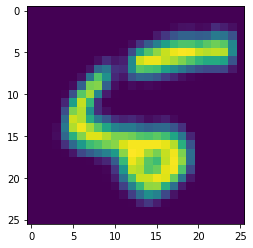

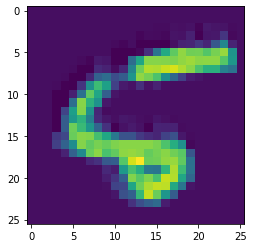

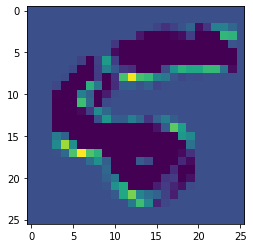

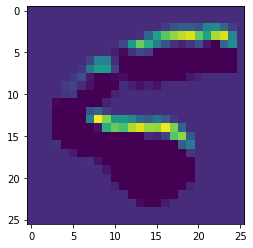

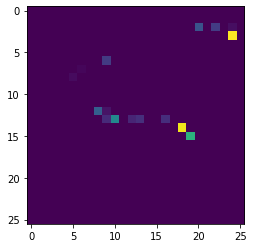

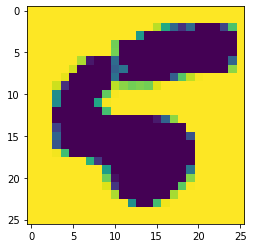

In [26]:
import matplotlib.pyplot as plt

first_layer_activations = activations [0]
for i in range(7):
  plt.figure()
  plt.imshow(first_layer_activations[0,:,:,i],cmap = 'viridis')

Once we get into larger CNNs for cats, birds and object detection, we'll come back to such methods to visualize

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide


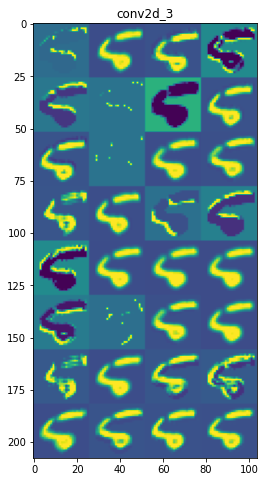

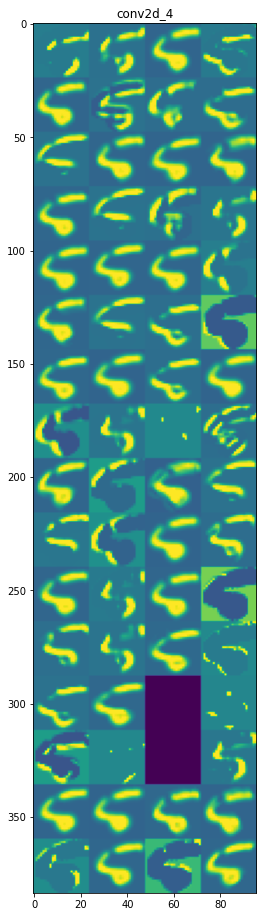

In [27]:
import numpy as np
import matplotlib.pyplot as plt

activations = activation_model.predict(x_test[8].reshape(1,28,28,1)) #change the input image to see different images

first_layer_activations = activations [0]

layer_names = []

for layer in model.layers[:9]:
  layer_names.append(layer.name)
images_per_row = 4

#get CONV layers
conv_layer_names = []
for layer_name in layer_names:
  if 'conv2d' in layer_name:
    conv_layer_names.append(layer_name)

for layer_name,layer_activation in zip(conv_layer_names,activations):
  n_features = layer_activation.shape[-1]
  size = layer_activation.shape[1]

  n_cols = n_features // images_per_row
  display_grid = np.zeros((size*n_cols,images_per_row*size))

  for col in range(n_cols):
    for row in range(images_per_row):
      channel_image = layer_activation[0,:,:,col*images_per_row+row]

      channel_image -= channel_image.mean()
      channel_image /= channel_image.std()
      channel_image *=64
      channel_image +=128

      channel_image = np.clip(channel_image,0,255).astype('uint8')
      display_grid [col*size:(col+1)*size,
                    row*size:(row+1)*size] = channel_image

  scale = 1./size
  plt.figure(figsize=(scale * display_grid.shape[1],
                      scale*display_grid.shape[0]))
  plt.title(layer_name)
  plt.grid(False)
  plt.imshow(display_grid,aspect='auto',cmap='viridis')